For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

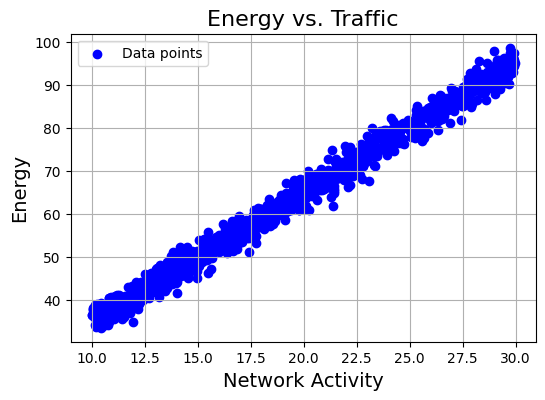

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

Oppgave 2a) Modellen kom fram til følgende lineære sammenheng mellom energi, E, og nettaktivitet, x: Energi = 3.11 x + 2.66


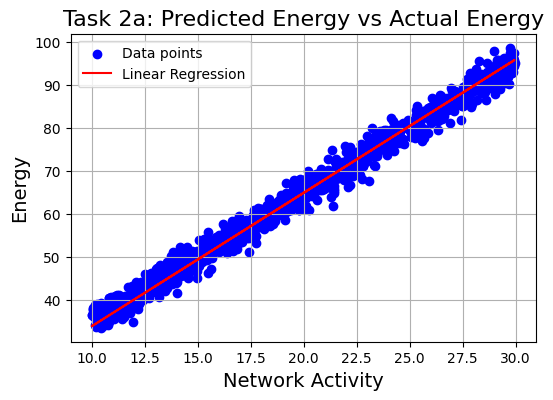

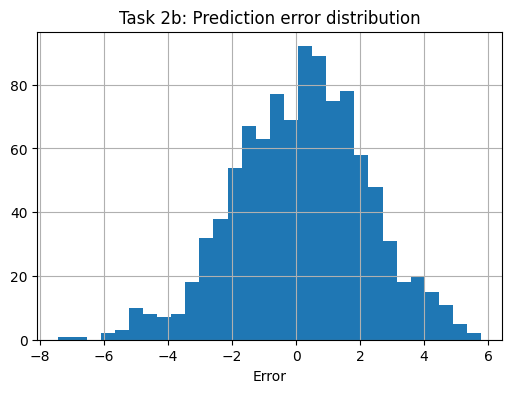

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], lr.predict(data['Net_Activity']), c='red', label='Linear Regression')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Task 2a: Predicted Energy vs Actual Energy', fontsize=16)
plt.legend()
plt.show()

error = - lr.predict(data['Net_Activity']) + data['Energy']
plt.figure(figsize=(6, 4))
plt.hist(error, bins=30)
plt.grid(True)
plt.xlabel('Error')
plt.title('Task 2b: Prediction error distribution')
plt.show()

Oppgave 2

a) Modellen kom fram til følgende lineære sammenheng mellom energi, E, og nettaktivitet, x: Energi = 3.11 x + 2.66. Plottet av lineær regresjonen ser man i figuren 'Task 2a: Predicted Energy vs Actual Energy'.

b) I figuren 'Task 2b: Prediction error distribution' ser man differansen mellom predicted verdi for energi, og den faktiske verdien for energi, også kalt residualene. Residualene ser ut til å være normalfordelt med forventningsverdi 0, samtidig som mesteparten av de havner innenfor et område på -2 og 2. Dette tyder på ganske god nøyaktighet, og at en lineær regresjon passer dataen. Det at residualene er normaltfordelt gjør at prediksjonen blir en forventningsrett estimator for energiforbruket. En forventningsrett estimator (unbiased estimator) er en estimator for en parameter der forventingsverdien er den sanne parameteren.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

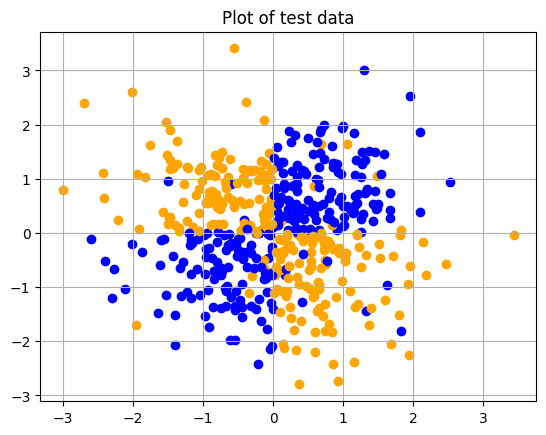

Modellens nøyaktighet med en ny feature:
0.9
Modellens nøyaktighet uten justeringer:
0.49
Beslutningstremodellens nøyaktighet med DecisionTreeClassifier:
0.872


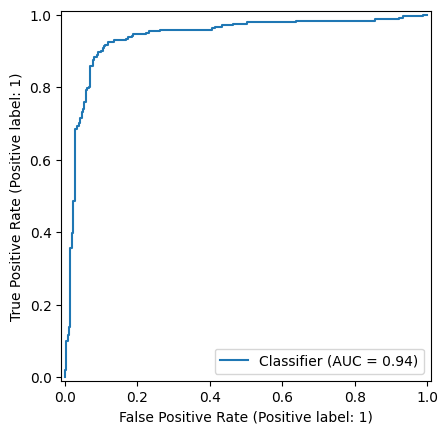

In [6]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

from logisitc_regression import LogisticRegression

lg_adjusted = LogisticRegression()
lg_adjusted.fit_lg(train, 2)

lg_not_adjusted = LogisticRegression()
lg_not_adjusted.fit_lg(train, 0)

x0 = test[['x0']].to_numpy()
x1 = test[['x1']].to_numpy()

y = test['y'].to_numpy()
#y_adjusted = np.array(lg_adjusted.predict_lg(test, 2))
#y_not_adjusted = np.array(lg_not_adjusted.predict_lg(test, 0))

for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x0[i], x1[i], c='blue', label='Negative class')
    else:
        plt.scatter(x0[i], x1[i], c='orange', label='Positive class')
plt.grid(True)
plt.title('Plot of test data')
plt.show()

"""
epochList = np.arange(0, lg_adjusted.epochs, 1)
plt.xlabel('Epoker')
plt.ylabel('Tapsfunksjon')
plt.title('Plott av tapsfunksjon over læringsepokene')
plt.grid(True)
plt.plot(epochList, lg_adjusted.losses, label='Loss')
plt.show()
print(lg_adjusted.losses[999])
"""

print('Modellens nøyaktighet med en ny feature:')
y_adjusted = np.array(lg_adjusted.predict_lg(test, 2))
print('Modellens nøyaktighet uten justeringer:')
y_not_adjusted = np.array(lg_not_adjusted.predict_lg(test, 0))

from sklearn.tree import DecisionTreeClassifier

mission2Tree = DecisionTreeClassifier(max_features=2)
mission2Tree.fit(train[['x0', 'x1']], train[['y']])
y_tree_pred = mission2Tree.predict(test[['x0', 'x1']])

print("Beslutningstremodellens nøyaktighet med DecisionTreeClassifier:")
print(np.mean(y == y_tree_pred))

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y, y_adjusted)
plt.show()

Oppgave 3

a) Til å begynne ble modellen trent på den ujusterte dataen. Plottet av dataen ser du i plottet Plot of test data rett over. Uansett valg av hyperparametre, ga dette en nøyaktighet rundt 50%. Siden dataen er balansert mellom klassene, var en nøyaktighet på 50% så og si vill gjetting. Det er fordi modellen prøvde å finne en lineær sammenheng mellom dataen og klassene y, selv om plottet over tydelig viser at dataen legger seg i et XOR-mønster, noe ulineært. Løsningen var da å legge til en ekstra feature x_2 som var x_0 ganget med x_1. Det var fordi i den positive klassen ser vi fra plottet at kun en av x-ene vil være negativ, mens i den negative klassen var enten begge x-ene negativ eller begge positiv. x_2 ville da være negativ for den positive klassen, og positiv for den negative klassen. Dette ga en nøyaktighet på 90%.

b) Modellens induktive bias er antakelsen om at det finnes en lineær kombinasjon av featurene er tilstrekkelig for å klassifisere de. Den er viktig fordi det er denne antakelsen den bruker for å predikere usett data.

c) Scikit sin DecisionTreeClassifier var i stand til å løse problemet også med en nøyaktighet på 87,6% uten å legge til en ekstra feature. Sammenliknet med den logistisk regresjonsmodellen så har ikke et beslutningstre en induktiv bias om at en lineærkombinasjon av inputdata skal kunne skille mellom klassene. En slik modell har som induktiv bias at det finnes terskler på hver feature som dataen kan separeres på.

d) ROC-kurven ligger over.

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [7]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [8]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

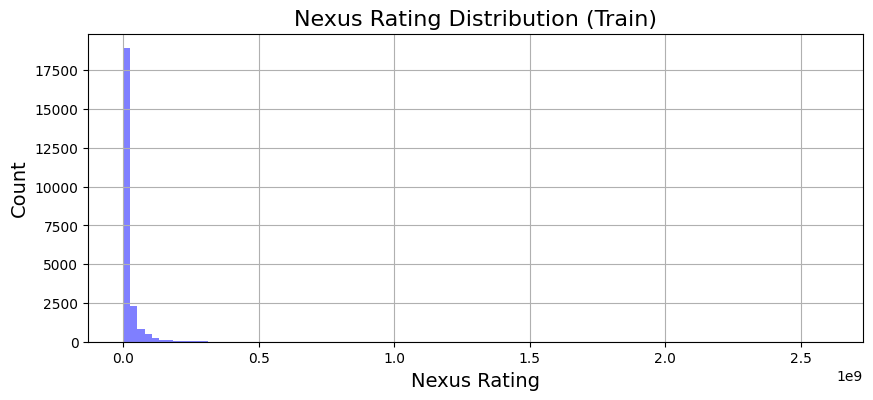

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [10]:

from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [11]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
